In [2]:
import GPy as GPy
import numpy as np
import matplotlib.pyplot as plt
import json
import io
from sklearn.preprocessing import minmax_scale

In [4]:
def GP_grid_to_json(grids):
    
    dicts = []
    
    for grid in grids:
    
        json_dict = {}

        for i in range(grid.shape[0]):
            json_dict[i] = {}
            for j in range(grid.shape[1]):
                json_dict[i][j] = int(grid[i][j])
                
        dicts.append(json_dict)

    json_data = json.dumps(dicts, ensure_ascii=False)        
    
    return json_data
    

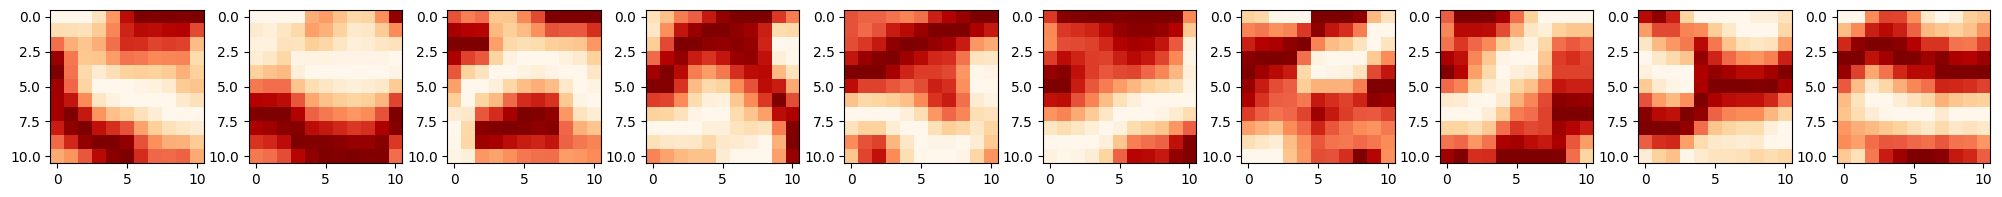

In [5]:
f, ax = plt.subplots(1, 10, figsize=(20, 5))

grids = []

xmin=0 
xmax=10

for i in range(30):

    k = GPy.kern.RBF(input_dim=2, variance=1, lengthscale=2)

    xx, yy = np.mgrid[xmin:xmax+1, xmin:xmax+1]
    X = np.vstack((xx.flatten(), yy.flatten())).T 
    K = k.K(X) #compute covariance matrix of x X
    s = np.random.multivariate_normal(np.zeros(X.shape[0]), K) #GP prior distribution
    
    grid = s.reshape(*xx.shape)
    grid = (minmax_scale(grid) * 100).astype(int)
    grids.append(grid)

    if i < 10:
        ax[i].imshow(grid, interpolation='none', cmap=plt.get_cmap('OrRd'))

plt.tight_layout()

In [8]:
grid_json = GP_grid_to_json(grids)

with io.open('sample_grid2.json', 'w', encoding='utf8') as outfile:
    outfile.write(grid_json)